# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [117]:
import pandas as pd
import statsmodels.api as sm
import numpy as np 
#1.1

df=pd.read_csv('data/tennis.csv')
df=df.dropna()


sm.OLS(
    df['player1 total points won'],
    sm.add_constant(
        pd.get_dummies(df.surface, drop_first=True)),
        cov_type='HC2'
).fit().summary()



####
# Federer scored  on average 6.1456 points less in Indoor: Hard than in 



<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     12.68
Date:                      Mon, 19 Apr 2021   Prob (F-statistic):           4.51e-10
Time:                              20:38:47   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.596     23.147      0.000      76.172      90.284
Indoor: Hard      -6.1456      4.090     -1.503      0.133     -14.171       1.880
Outdoor: Clay      4.8599      4.042      1.202      0.230      -3.073      12.792
Outdoor: Grass    15.4655      4.344      3.560      0.000       6.941      23.990
Outdoor: Hard      4.5908      3.829      1.199      0.231      -2.923      12.105
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
#1.2

sm.OLS(
    df['player1 total points won'],

        pd.get_dummies(df.surface, drop_first=True),
        cov_type='HC2'

    
).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.865
Method:                       Least Squares   F-statistic:                              1623.
Date:                      Mon, 19 Apr 2021   Prob (F-statistic):                        0.00
Time:                              20:38:47   Log-Likelihood:                         -5009.2
No. Observations:                      1016   AIC:                                  1.003e+04
Df Residuals:                          1012   BIC:                                  1.005e+04
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Hard      77.0825      2.410     31.990      0.000      72.354      81.811
Outdoor: Clay     88.0880      2.284     38.575      0.000      83.607      92.569
Outdoor: Grass    98.6935      3.014     32.746      0.000      92.779     104.608
Outdoor: Hard     87.8188      1.628     53.944      0.000      84.624      91.013
==============================================================================
Omnibus:                      212.052   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.573
Skew:                           1.209   Prob(JB):                     3.49e-91
Kurtosis:                       4.998   Cond. No.                         1.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
pd.get_dummies(df.surface, drop_first=True)

,Indoor: Hard,Outdoor: Clay,Outdoor: Grass,Outdoor: Hard
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
5,0,1,0,0
...,...,...,...,...
1173,0,0,0,1
1174,0,0,0,1
1175,0,0,0,1
1176,0,0,0,1


In [120]:
from scipy import stats
#1.3

#stats.ttest_ind(rvs1, rvs3)

def t_test(x1,x2):
    return (np.mean(x1)-np.mean(x2))/np.sqrt( np.std(x1)**2/len(x1)+np.std(x2)**2/len(x2))

X=pd.get_dummies(df.surface, drop_first=True)
x=df['player1 total points won'].values
x1=X['Outdoor: Clay'].values
x2=X['Outdoor: Grass'].values

print(t_test(x2,x))

stats.ttest_ind(x2,x)

-99.66130034785819


Ttest_indResult(statistic=-99.61224235800513, pvalue=0.0)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [121]:
#loading the data

import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split


df=sns.load_dataset('titanic')

In [122]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [123]:
import itertools



#preparing X 



#first I will drop the embarked column because embark_town
#is exactly the same information but we can see the name of
#the town. (I will do the same with alive  and pclass as well )
#Note: not droping who because there are man woman and children
df_titanic=df.drop(['embarked','pclass','alive'],axis=1)
df_cat=df_titanic[['sex','class','who','deck','embark_town']]


cat2=pd.get_dummies(df_cat,dummy_na=True)
col_dummy_nodrop=set(cat2.columns)

cat=pd.get_dummies(df_cat,dummy_na=True,drop_first=True)
col_dummy=set(cat.columns)

#non categorical columns
df_non_cat=df_titanic[['age','sibsp','parch','fare','adult_male','alone','survived']]

#True-->1 False-->0
df_non_cat.adult_male.loc[df_non_cat.adult_male==True]=1
df_non_cat.adult_male.loc[df_non_cat.adult_male==False]=0
#True-->1 False-->0
df_non_cat.alone.loc[df_non_cat.alone==True]=1
df_non_cat.alone.loc[df_non_cat.alone==False]=0

X=pd.concat([df_non_cat, cat], axis=1)

X=X.dropna()

#setting the y value
y1=X.survived

#since it is the y 
X=X.drop(['survived'],axis=1)

X=sm.add_constant(X)

droped=col_dummy_nodrop-col_dummy
print(F' Dummy variable dropped column:\n {droped}')



#################################################
#################################################

cols=X.columns.drop(['const'])
#number of interaction
n=2

#The interactions between the genres. 
interaction=True
L=list(itertools.combinations(cols, n))

if interaction==True:
    if n==2:
        for (a,b) in L:
            X[(a+'*'+b)]=X[a]*X[b]

    if n==3:
        for (a,b,c) in L:
            X[(a+'*'+b+'*'+c)]=X[a]*X[b]*X[c]




            

#all the columns that are all 0            
all_zero=X.columns[(X == 0).all()]
X=X.drop(all_zero,axis=1)


###################################################################
#------------------------------------------------------------------
X, x_test, y1, y_test = train_test_split(X, y1, test_size=1/10, random_state=0)
###################################################################
#------------------------------------------------------------------


 Dummy variable dropped column:
 {'sex_female', 'who_child', 'deck_A', 'embark_town_Cherbourg', 'class_First'}
C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [124]:
X=X.astype(float)

reg=sm.OLS(y1,X,cov_type='HC2').fit()

# I drop the columns where the p_value is >0.1 one by one 
#except the constant term 
col_list=[]

reg=sm.OLS(y1, X).fit()
#while there are p values higher than 0.1
while len(reg.pvalues.loc[(reg.pvalues>0.1)&(reg.pvalues.index!='const')])!= 0:

    #the column with the highest p values that we will drop
    col=reg.pvalues.loc[(reg.pvalues==reg.pvalues.max())&(reg.pvalues.index!='const') ].index[0]
    col_list.append(col)
    X=X.drop([col],axis=1)
    reg=sm.OLS(y1, X).fit()
    print('droped column:',col)

x_test=x_test.drop(col_list,axis=1)


droped column: who_woman*embark_town_Queenstown
droped column: sex_male*class_Second
droped column: fare*deck_G
droped column: deck_F
droped column: deck_F*embark_town_Southampton
droped column: age*embark_town_nan
droped column: sex_male*deck_C
droped column: who_man*deck_C
droped column: adult_male*deck_C
droped column: fare*who_woman
droped column: fare
droped column: adult_male*deck_B
droped column: who_man*deck_B
droped column: class_Second
droped column: parch*deck_B
droped column: who_man*deck_D
droped column: sex_male*deck_D
droped column: adult_male*deck_D
droped column: alone*deck_C
droped column: deck_C*embark_town_Southampton
droped column: embark_town_Southampton
droped column: adult_male
droped column: sex_male*who_man
droped column: adult_male*sex_male
droped column: adult_male*who_man
droped column: who_man
droped column: fare*class_Second
droped column: parch
droped column: sibsp*deck_F
droped column: fare*deck_F
droped column: adult_male*deck_F
droped column: who_man*

In [125]:
#X, x_test, y1, y_test

print(len(col_list))

reg.summary()



107


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           4.85e-78
Time:                        20:38:49   Log-Likelihood:                -184.81
No. Observations:                 642   AIC:                             473.6
Df Residuals:                     590   BIC:                             705.8
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.3950      0.139     10.056      0.000       1.123       1.668
age                                    -0.0296      0.013     -2.194      0.029      -0.056      -0.003
sex_male                               -1.0084      0.184     -5.490      0.000      -1.369      -0.648
class_Third                            -0.4606      0.093     -4.977      0.000      -0.642      -0.279
who_woman                              -0.4471      0.160     -2.798      0.005      -0.761      -0.133
deck_G                                 -0.3739      0.142     -2.639      0.009      -0.652      -0.096
embark_town_Queenstown                -17.7336      9.111     -1.946      0.052     -35.628       0.161
age*sibsp                               0.0050      0.001      3.651      0.000       0.002       0.008
age*parch                              -0.0042      0.002     -2.592      0.010      -0.007      -0.001
age*fare                             3.435e-05   1.55e-05      2.220      0.027    3.97e-06    6.47e-05
age*sex_male                            0.0265      0.013      1.966      0.050    3.04e-05       0.053
age*who_woman                           0.0264      0.014      1.943      0.052      -0.000       0.053
age*deck_E                             -0.0244      0.009     -2.780      0.006      -0.042      -0.007
age*deck_F                             -0.0184      0.009     -1.972      0.049      -0.037   -7.79e-05
age*deck_G                              0.3243      0.141      2.307      0.021       0.048       0.600
sibsp*adult_male                        0.0960      0.040      2.396      0.017       0.017       0.175
sibsp*sex_male                         -0.1759      0.053     -3.313      0.001      -0.280      -0.072
sibsp*class_Second                     -0.1156      0.059     -1.953      0.051      -0.232       0.001
sibsp*class_Third                      -0.1704      0.039     -4.333      0.000      -0.248      -0.093
sibsp*who_man                           0.0960      0.040      2.396      0.017       0.017       0.175
sibsp*deck_C                           -0.1731      0.065     -2.664      0.008      -0.301      -0.045
sibsp*deck_G                            0.5361      0.205      2.614      0.009       0.133       0.939
parch*fare                             -0.0007      0.000     -2.145      0.032      -0.001   -6.11e-05
parch*adult_male                        0.0908      0.038      2.401      0.017       0.017       0.165
parch*class_Third                      -0.0738      0.044     -1.677      0.094      -0.160       0.013
parch*who_man                           0.0908      0.038      2.401      0.017       0.017       0.165
parch*who_woman                         0.2004      0.066      3.04

In [126]:
from sklearn.metrics import (confusion_matrix,  accuracy_score) 


xx=reg.predict(x_test)
xx.loc[xx>0.5]=1
xx.loc[xx<0.5]=0

prediction = list(map(round, xx))

cm = confusion_matrix(y_test.astype(int), xx.astype(int))  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))



Confusion Matrix : 
 [[39  5]
 [ 9 19]]
Test accuracy =  0.8055555555555556


In [127]:
model=sm.OLS(y1, X).fit_regularized(method='elastic_net', alpha=0.001, L1_wt=2.0)

xx=model.predict(x_test)
xx.loc[xx>0.5]=1
xx.loc[xx<0.5]=0

prediction = list(map(round, xx))

cm = confusion_matrix(y_test.astype(int), xx.astype(int))  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[36  8]
 [ 9 19]]
Test accuracy =  0.7638888888888888


# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [128]:
df=pd.read_csv('data/house_price.csv')


import itertools
from sklearn.preprocessing import PolynomialFeatures




In [132]:
num_cols = df._get_numeric_data().columns
numCols=set(num_cols)
cat=set(df.columns)-numCols
cat=list(cat)
df[cat]


cat_df=pd.get_dummies(df[cat],dummy_na=True,drop_first=True)
num_col_df=df[(num_cols)]
X=pd.concat([num_col_df, cat_df], axis=1)
X=X.dropna()
y=X.SalePrice.reset_index(drop=True)
X=X.reset_index(drop=True)
X=X.drop(columns=['Id','SalePrice'])













reg=sm.OLS(y, X).fit()
#while there are p values higher than 0.1
while len(reg.pvalues.loc[(reg.pvalues>0.1)&(reg.pvalues.index!='const')])!= 0:

    #the column with the highest p values that we will drop
    col=reg.pvalues.loc[(reg.pvalues==reg.pvalues.max())&(reg.pvalues.index!='const') ].index[0]
    col_list.append(col)
    X=X.drop([col],axis=1)
    reg=sm.OLS(y, X).fit()
    print('droped column:',col)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/10, random_state=0)

model=sm.OLS(y_train, X_train).fit()
#model=sm.OLS(y_train, X_train).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1)

xx=model.predict(X_test)
xx=np.array(xx)

Error_per=np.abs(np.round(xx)-y_test)/y_test*100


droped column: Functional_Min1
droped column: Neighborhood_IDOTRR
droped column: Neighborhood_Somerst
droped column: Functional_Min2
droped column: PavedDrive_nan
droped column: Fence_MnWw
droped column: Exterior1st_BrkFace
droped column: PavedDrive_Y
droped column: BsmtFinType2_GLQ
droped column: RoofStyle_nan
droped column: Neighborhood_BrkSide
droped column: LandSlope_nan
droped column: Utilities_nan
droped column: FireplaceQu_nan
droped column: MSSubClass
droped column: GarageFinish_Unf
droped column: SaleCondition_Family
droped column: HeatingQC_Po
droped column: LowQualFinSF
droped column: Condition2_RRNn
droped column: MiscVal
droped column: CentralAir_nan
droped column: Condition1_nan
droped column: SaleType_ConLw
droped column: Foundation_Slab
droped column: RoofStyle_Shed
droped column: BsmtFinType1_Rec
droped column: GarageQual_nan
droped column: Exterior1st_MetalSd
droped column: Electrical_FuseP
droped column: BsmtHalfBath
droped column: Condition1_Feedr
droped column: Ope

61

(array([21., 27., 11., 11., 13.,  8.,  5.,  3.,  2.,  2.,  1.,  1.,  1.,
         2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.11582278,   2.28308555,   4.45034831,   6.61761108,
          8.78487385,  10.95213661,  13.11939938,  15.28666214,
         17.45392491,  19.62118767,  21.78845044,  23.9557132 ,
         26.12297597,  28.29023873,  30.4575015 ,  32.62476426,
         34.79202703,  36.95928979,  39.12655256,  41.29381532,
         43.46107809,  45.62834085,  47.79560362,  49.96286638,
         52.13012915,  54.29739191,  56.46465468,  58.63191744,
         60.79918021,  62.96644297,  65.13370574,  67.3009685 ,
         69.46823127,  71.63549403,  73.8027568 ,  75.97001956,
         78.13728233,  80.30454509,  82.47180786,  84.63907062,
         86.80633339,  88.97359615,  91.14085892,  93.30812168,
         95.

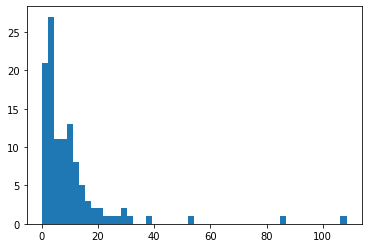

In [141]:
import matplotlib.pyplot as plt


#histogram of E%  iin the prediction of the price 
plt.hist(Error_per,bins=50)